## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("inputs\Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df['returns'] = df.market_value.pct_change(1)*100

## Creating Squared Returns

In [8]:
df['sq_returns'] = df.returns.mul(df.returns)

## Returns vs Squared Returns

<AxesSubplot:xlabel='date'>

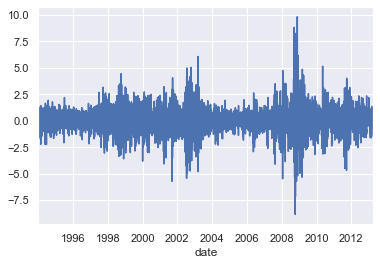

In [9]:
df['returns'].plot()

<AxesSubplot:xlabel='date'>

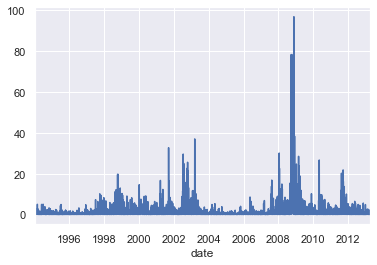

In [10]:
df['sq_returns'].plot()

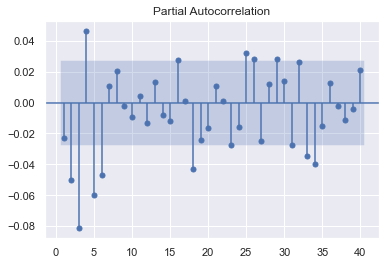

In [13]:
sgt.plot_pacf(df.returns[1:], zero=False, lags=40)
plt.show()

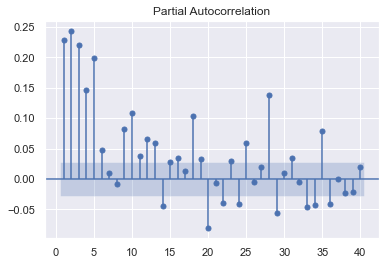

In [15]:
sgt.plot_pacf(df.sq_returns[1:], zero=False, lags=40)
plt.show()

## The arch_model() Method

In [16]:
from arch import arch_model

In [17]:
model_arch1 = arch_model(df.returns[1:])
results_arch1 = model_arch1.fit()
results_arch1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6579303469.390623
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2701100877.2298183
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7009.030632045198
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7024.035884053223
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712866814991
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6975.418107495356
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7092.271289251072
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6973.8792679196495
Iteration:      9,   Func. Count:     59,   Neg. LLF: 6970.088049064454
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478417896
Iteration:     11,   Func. Count:     69,   Neg. LLF: 6970.058367475591
Iteration:     12,   Func. Count:     74,   Neg. LLF: 6970.058366189888
Iteration:     13,   Func. Count:     78,   Neg. LLF: 6970.058366189172
Optimization terminated successfully    (Exit mode 0)
        

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Mon, Aug 01 2022   Df Residuals:                     5019
Time:                        16:54:12   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

## The Simple ARCH(1) 

In [18]:
model_arch1 = arch_model(df.returns[1:], mean="Constant", vol="ARCH", p=1)
results_arch1 = model_arch1.fit()
results_arch1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 29071.83486537579
Iteration:      2,   Func. Count:     13,   Neg. LLF: 12040.736044828116
Iteration:      3,   Func. Count:     20,   Neg. LLF: 7809.7227529035545
Iteration:      4,   Func. Count:     26,   Neg. LLF: 7660.088789376123
Iteration:      5,   Func. Count:     30,   Neg. LLF: 7660.088782040875
Iteration:      6,   Func. Count:     33,   Neg. LLF: 7660.088782040906
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7660.088782040875
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Mon, Aug 01 2022   Df Residuals:                     5019
Time:                        17:00:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0345  1.603e-02      2.151  3.147e-02 [3.063e-03,6.590e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9206  4.309e-02     21.365 2.855e-101 [  0.836,  1.005]
alpha[1]       0.3684  5.040e-02      7.310  2.673e-13 [  0.270,  0.467]
========================================================================

Covariance estimator: robust
"""

## Higher-Lag ARCH Models

In [19]:
model_arch2 = arch_model(df.returns[1:], mean="Constant", vol="ARCH", p=2)
results_arch2 = model_arch2.fit()
results_arch2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 34336.61062838968
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11809.810463437398
Iteration:      3,   Func. Count:     24,   Neg. LLF: 7900.582867042022
Iteration:      4,   Func. Count:     31,   Neg. LLF: 7647.101576187482
Iteration:      5,   Func. Count:     37,   Neg. LLF: 8810.02930517937
Iteration:      6,   Func. Count:     44,   Neg. LLF: 7449.551200532487
Iteration:      7,   Func. Count:     49,   Neg. LLF: 7449.545177539265
Iteration:      8,   Func. Count:     54,   Neg. LLF: 7449.545164098316
Iteration:      9,   Func. Count:     58,   Neg. LLF: 7449.545164098206
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7449.545164098316
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Mon, Aug 01 2022   Df Residuals:                     5019
Time:                        17:06:20   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0484  1.401e-02      3.455  5.495e-04 [2.095e-02,7.585e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6978  3.564e-02     19.580  2.272e-85 [  0.628,  0.768]
alpha[1]       0.2202  3.474e-02      6.339  2.311e-10 [  0.152,  0.288]
alpha[2]       0.2783  3.645e-02      7.635  2.260e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""